In [6]:
import os
from pathlib import Path
if '_cwd' not in locals():
    _cwd = os.getcwd()
    os.chdir(Path(_cwd)/'..')
    os.chdir(Path(os.getcwd())/'..') # ew

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# add automatic reloading of modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loading data and model

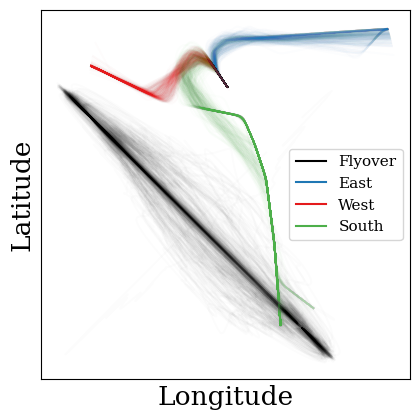

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
positions_flyover = np.load("data/aircraft_flyover/positions_flyover.npy")
labels_flyover = np.load("data/aircraft_flyover/labels_flyover.npy")

fix = 8
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.size": 16,
    "axes.titlesize": 12 + fix,
    "axes.labelsize": 11 + fix,
    "xtick.labelsize": 11 + fix,
    "ytick.labelsize": 11 + fix,
    "legend.fontsize": 11,
})

# ✅ Define color mapping
color_map = {
    'Flyover': '#000000',
    'East': '#1f77b4',
    'West': '#e41a1c',
    'South': '#4daf4a',
}

# ✅ Plot flights
for flight, label in zip(positions_flyover, labels_flyover):
    plt.plot(flight[:, 0], flight[:, 1], color=color_map.get(label, '#000000'), alpha=0.01)

# ✅ Add legend with unique labels
for label, color in color_map.items():
    plt.plot([], [], color=color, label=f"{label}")

# ✅ Remove ticks
plt.xticks([])
plt.yticks([])

# ✅ Aspect ratio
plt.gca().set_aspect('equal', adjustable='box')

# ✅ Set axis labels
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# ✅ Final touches
plt.legend()
plt.show()


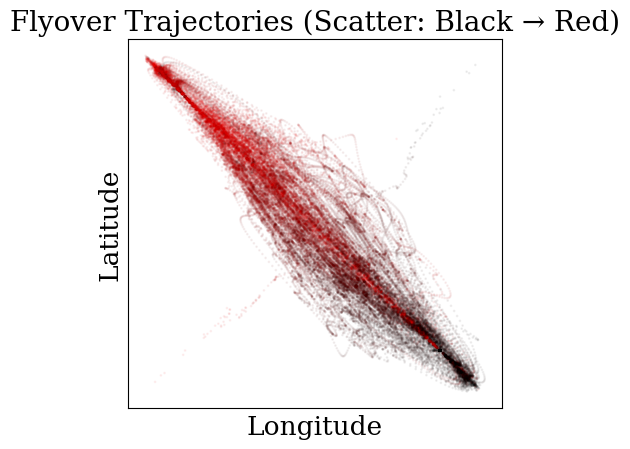

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
positions_flyover = np.load("data/aircraft_flyover/positions_flyover.npy")
labels_flyover = np.load("data/aircraft_flyover/labels_flyover.npy")

fix = 8
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.size": 16,
    "axes.titlesize": 12 + fix,
    "axes.labelsize": 11 + fix,
    "xtick.labelsize": 11 + fix,
    "ytick.labelsize": 11 + fix,
    "legend.fontsize": 11,
})

# ✅ Filter flyover only
flyover_flights = [flight for flight, label in zip(positions_flyover, labels_flyover) if label == 'Flyover']

# ✅ Plot each flight with fading black -> red scatter
for flight in flyover_flights:
    num_points = flight.shape[0]
    # Gradient from black (0,0,0) to red (1,0,0)
    colors = [(i / (num_points - 1), 0, 0) for i in range(num_points)]
    plt.scatter(flight[:, 0], flight[:, 1], c=colors, s=1, alpha=0.05)

# Clean up plot
plt.xticks([])
plt.yticks([])
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Flyover Trajectories (Scatter: Black → Red)")
plt.show()
